In [1]:
require 'Utils'
require 'nngraph';
require 'loadcaffe'
require 'image'
require 'VGG'
require 'optim'
require 'Net2'
dtype = 'torch.DoubleTensor'



In [2]:
basedir = '../../results/'
batch_size = 20;
require'lfs'
dirs = {}
for file in lfs.dir(basedir) do
    if string.find(file,'image_checkpoint') then
        table.insert(dirs,basedir .. file .. "/")
    end
end

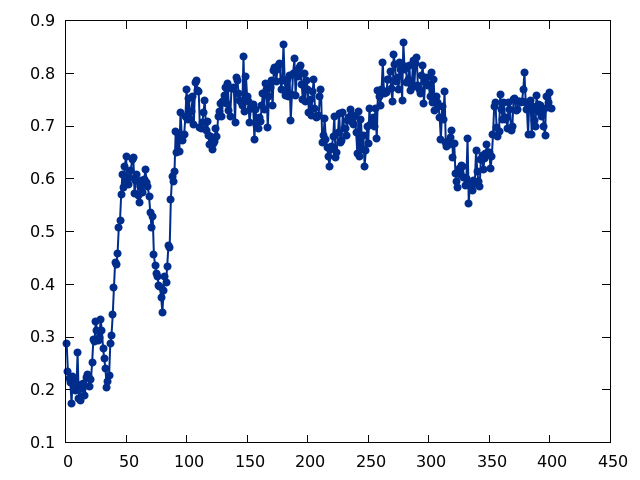

In [3]:
itorch.image(image.load(basedir..'train_history.png'))

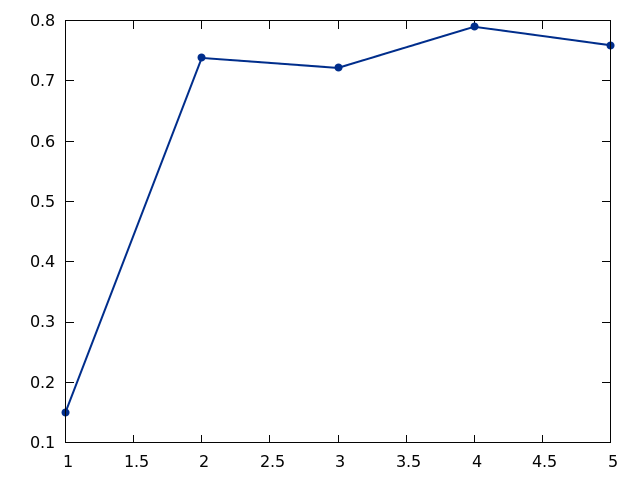

In [4]:
itorch.image(image.load(basedir..'val_history.png'))

In [5]:
dir1 = dirs[1]
print(dir1)
orig_images = {}
input_images = {}
for i=1,batch_size do
    table.insert(input_images,image.load(dir1 .. 'input_' .. i .. '.png'))
    table.insert(orig_images,image.load(dir1 .. 'orig_' .. i .. '.png'))
end
-- print(input_images)

../../results/image_checkpoint_401/	


In [6]:
size = 96
checkpoint_images = {}
for j=1,#dirs do
    temp_image_dict = {}
    for i=1,batch_size do
        table.insert(temp_image_dict,image.scale( 
                image.load(dirs[j] .. 'output_' .. i .. '.png'), size,size))
    end
    print(dirs[j])
    table.insert(checkpoint_images,temp_image_dict)
end

../../results/image_checkpoint_401/	


../../results/image_checkpoint_301/	


../../results/image_checkpoint_1301/	


../../results/image_checkpoint_801/	


../../results/image_checkpoint_1701/	


../../results/image_checkpoint_201/	


../../results/image_checkpoint_1801/	


../../results/image_checkpoint_1901/	


../../results/image_checkpoint_1401/	


../../results/image_checkpoint_1501/	


../../results/image_checkpoint_1001/	


../../results/image_checkpoint_1601/	


../../results/image_checkpoint_101/	


../../results/image_checkpoint_1/	


../../results/image_checkpoint_901/	


../../results/image_checkpoint_1101/	


../../results/image_checkpoint_701/	


../../results/image_checkpoint_501/	


../../results/image_checkpoint_1201/	


../../results/image_checkpoint_601/	


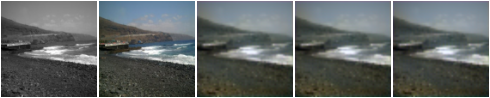

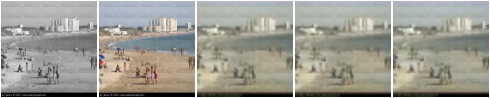

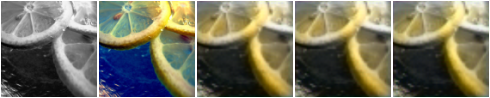

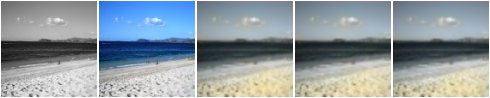

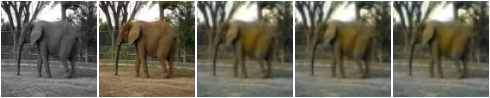

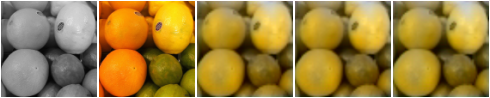

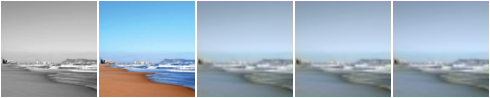

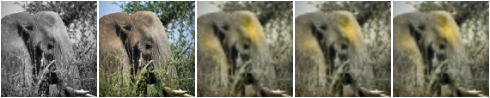

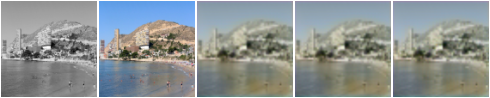

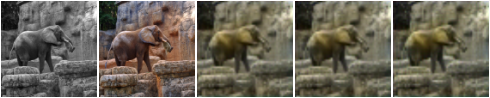

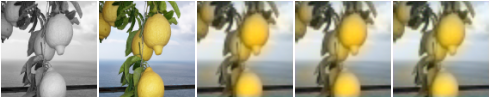

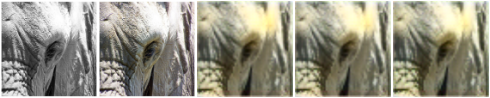

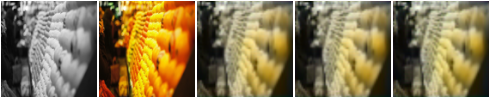

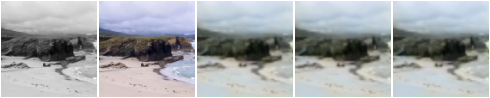

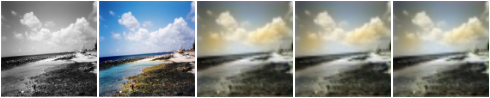

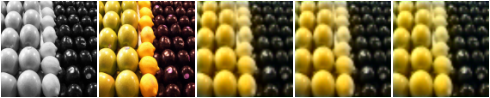

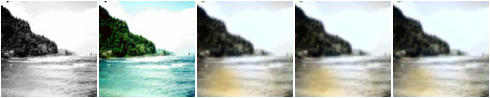

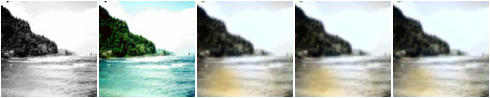

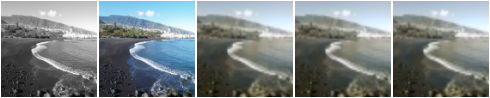

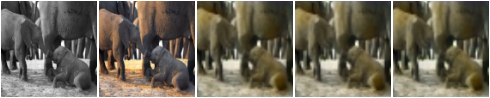

In [7]:
title = "Input" .. "         " .. "Original "
for j=1,9 do
    title = title .. "           " .. j
end

for i=1,batch_size do
    temp_image_dict = {}
    table.insert(temp_image_dict,image.scale(input_images[i],size,size))
    table.insert(temp_image_dict,image.scale(orig_images[i],size,size))
    for j=7,9 do
        table.insert(temp_image_dict,checkpoint_images[j][i])
    end
    itorch.image(temp_image_dict)
end

In [18]:
require 'nngraph'
require 'gnuplot'
require 'nn'

-- checkpoint_1 = torch.load('../../arxiv/all_classes_32_3_MSE.t7')  
checkpoint_1 = torch.load('../../results/checkpoint_class_1400.t7')   
a = torch.Tensor(checkpoint_1.train_loss_history) 

cannot open <../../results/checkpoint_class_1400.t7> in mode r  at /tmp/luarocks_torch-scm-1-6930/torch7/lib/TH/THDiskFile.c:640
stack traceback:
	[C]: at 0x7f02c654b460
	[C]: in function 'DiskFile'
	/home/kedart/torch/install/share/lua/5.1/torch/File.lua:388: in function 'load'
	[string "require 'nngraph'..."]:6: in main chunk
	[C]: in function 'xpcall'
	/home/kedart/torch/install/share/lua/5.1/itorch/main.lua:209: in function </home/kedart/torch/install/share/lua/5.1/itorch/main.lua:173>
	/home/kedart/torch/install/share/lua/5.1/lzmq/poller.lua:75: in function 'poll'
	/home/kedart/torch/install/share/lua/5.1/lzmq/impl/loop.lua:307: in function 'poll'
	/home/kedart/torch/install/share/lua/5.1/lzmq/impl/loop.lua:325: in function 'sleep_ex'
	/home/kedart/torch/install/share/lua/5.1/lzmq/impl/loop.lua:370: in function 'start'
	/home/kedart/torch/install/share/lua/5.1/itorch/main.lua:381: in main chunk
	[C]: in function 'require'
	(command line):1: in main chunk
	[C]: at 0x00406670: 

In [19]:
gnuplot.pngfigure('plot_lemon_sky_elephant_class_temp_1.png')
gnuplot.plot(a)
gnuplot.plotflush()

...e/kedart/torch/install/share/lua/5.1/gnuplot/gnuplot.lua:330: empty argument list
stack traceback:
	[C]: in function 'error'
	...e/kedart/torch/install/share/lua/5.1/gnuplot/gnuplot.lua:330: in function 'getvars'
	...e/kedart/torch/install/share/lua/5.1/gnuplot/gnuplot.lua:970: in function 'plot'
	[string "gnuplot.pngfigure('plot_lemon_sky_elephant_cl..."]:2: in main chunk
	[C]: in function 'xpcall'
	/home/kedart/torch/install/share/lua/5.1/itorch/main.lua:209: in function </home/kedart/torch/install/share/lua/5.1/itorch/main.lua:173>
	/home/kedart/torch/install/share/lua/5.1/lzmq/poller.lua:75: in function 'poll'
	/home/kedart/torch/install/share/lua/5.1/lzmq/impl/loop.lua:307: in function 'poll'
	/home/kedart/torch/install/share/lua/5.1/lzmq/impl/loop.lua:325: in function 'sleep_ex'
	/home/kedart/torch/install/share/lua/5.1/lzmq/impl/loop.lua:370: in function 'start'
	/home/kedart/torch/install/share/lua/5.1/itorch/main.lua:381: in main chunk
	[C]: in function 'require'
	(command line):1: in main chunk
	[C]: at 0x00406670: 

In [ ]:
b = torch.Tensor(checkpoint_1.val_loss_history) 

In [ ]:
gnuplot.pngfigure('plot_lemon_sky_elephant_class_val_1.png')
gnuplot.plot(b)
gnuplot.plotflush()

In [ ]:
-- checkpoint_1 = torch.load('../../results/checkpoint_class_100.t7')
checkpoint_1 = torch.load('../../arxiv/all_classes_32_3_MSE.t7')
model = checkpoint_1.model
local crit = nn.AbsCriterion():type(dtype)
opt = checkpoint_1.opt
model:evaluate()

num_images = 8;
im_batch = get_validation_batch(num_images)
local x = torch.Tensor(im_batch:size()[1],im_batch:size()[2],224,224)

for i=1,im_batch:size()[1] do
    x[i] = preprocess(im_batch[i])
end
local uv_images, y_images = create_yuv_images(im_batch,56,56)
local x, uv_images = x:type(dtype), uv_images:type(dtype)
local y = uv_images*2
model:evaluate()
local scores = model:forward(x)
local val_loss = crit:forward(scores, y)
print(val_loss)
uv_op_load1 = model.output/2
for i = 1,num_images do
    size = 64
    itorch.image({image.scale(y2rgb(image.rgb2y(im_batch[i])),size,size),
                  image.scale(image.yuv2rgb(torch.cat(y_images[i],uv_op_load1[i],1)),size,size),
                  image.scale(image.yuv2rgb(torch.cat(y_images[i],uv_images[i],1)),size,size)})
end

In [ ]:
for i = 1,num_images do
    size = 112
    itorch.image({image.scale(y2rgb(image.rgb2y(im_batch[i])),size,size),
                  image.scale(image.yuv2rgb(torch.cat(y_images[i],uv_op_load1[i],1)),size,size),
                  image.scale(image.yuv2rgb(torch.cat(y_images[i],uv_images[i],1)),size,size)})
end

In [ ]:
collectgarbage()
checkpoint_1 = torch.load('../../results/checkpoint_80.t7')
model = checkpoint_1.model
local crit = nn.MSECriterion():type(dtype)
opt = checkpoint_1.opt
model:evaluate()

local im_batch = get_validation_batch(4)
local x = torch.Tensor(im_batch:size()[1],im_batch:size()[2],224,224)

for i=1,im_batch:size()[1] do
    x[i] = preprocess(im_batch[i])
end
local uv_images, y_images = create_yuv_images(im_batch,56,56)
local x, uv_images = x:type(dtype), uv_images:type(dtype)
local y = uv_images + 0.5
model:evaluate()
local scores = model:forward(x)
local val_loss = crit:forward(scores, y)
print(val_loss)
uv_op_load = model.output - 0.5
for i = 1,4 do
    size = 64
    itorch.image({image.scale(y2rgb(image.rgb2y(im_batch[i])),size,size),
                  image.scale(image.yuv2rgb(torch.cat(y_images[i],uv_op_load[i],1)),size,size),
                  image.scale(image.yuv2rgb(torch.cat(y_images[i],uv_images[i],1)),size,size)})
end

In [ ]:
for i = 1,8 do
    size = 64
    itorch.image({image.scale(y2rgb(image.rgb2y(im_batch[i])),size,size),
                  image.scale(image.yuv2rgb(torch.cat(y_images[i],uv_op_load[i],1)),size,size),
                  image.scale(image.yuv2rgb(torch.cat(y_images[i],uv_images[i],1)),size,size)})
end

In [ ]:
checkpoint_1 = torch.load('../../results/checkpoint_40.t7')
model = checkpoint_1.model
local crit = nn.MSECriterion():type(dtype)
opt = checkpoint_1.opt
model:evaluate()

local im_batch = get_validation_batch(opt.batch_size)
local x = torch.Tensor(im_batch:size()[1],im_batch:size()[2],224,224)

for i=1,im_batch:size()[1] do
    x[i] = preprocess(im_batch[i])
end
local uv_images, y_images = create_yuv_images(im_batch,56,56)
local x, uv_images = x:type(dtype), uv_images:type(dtype)
local y = uv_images + 0.5
model:evaluate()
local scores = model:forward(x)
local val_loss = crit:forward(scores, y)
print(val_loss)
uv_op_load = model.output - 0.5
for i = 1,2 do
    size = 64
    itorch.image({image.scale(y2rgb(image.rgb2y(im_batch[i])),size,size),
                  image.scale(image.yuv2rgb(torch.cat(y_images[i],uv_op_load[i],1)),size,size),
                  image.scale(image.yuv2rgb(torch.cat(y_images[i],uv_images[i],1)),size,size)})
end

In [ ]:
checkpoint_1 = torch.load('../../results/checkpoint_50.t7')
model = checkpoint_1.model
local crit = nn.MSECriterion():type(dtype)
opt = checkpoint_1.opt

local im_batch = get_validation_batch(opt.batch_size)
local x = torch.Tensor(im_batch:size()[1],im_batch:size()[2],224,224)

for i=1,im_batch:size()[1] do
    x[i] = preprocess(im_batch[i])
end
local uv_images, y_images = create_yuv_images(im_batch,56,56)
local x, uv_images = x:type(dtype), uv_images:type(dtype)
local y = uv_images + 0.5
model:evaluate()
local scores = model:forward(x)
local val_loss = crit:forward(scores, y)
print(val_loss)
uv_op_load = model.output - 0.5
for i = 1,2 do
    size = 64
    itorch.image({image.scale(y2rgb(image.rgb2y(im_batch[i])),size,size),
                  image.scale(image.yuv2rgb(torch.cat(y_images[i],uv_op_load[i],1)),size,size),
                  image.scale(image.yuv2rgb(torch.cat(y_images[i],uv_images[i],1)),size,size)})
end

In [ ]:
checkpoint_1 = torch.load('../../results/checkpoint_50.t7')
model = checkpoint_1.model
local crit = nn.MSECriterion():type(dtype)
opt = checkpoint_1.opt
model:evaluate()

local im_batch = get_validation_batch(opt.batch_size)
local x = torch.Tensor(im_batch:size()[1],im_batch:size()[2],224,224)

for i=1,im_batch:size()[1] do
    x[i] = preprocess(im_batch[i])
end
local uv_images, y_images = create_yuv_images(im_batch,56,56)
local x, uv_images = x:type(dtype), uv_images:type(dtype)
local y = uv_images + 0.5
model:evaluate()
local scores = model:forward(x)
local val_loss = crit:forward(scores, y)
print(val_loss)
uv_op_load = model.output - 0.5
for i = 1,2 do
    size = 64
    itorch.image({image.scale(y2rgb(image.rgb2y(im_batch[i])),size,size),
                  image.scale(image.yuv2rgb(torch.cat(y_images[i],uv_op_load[i],1)),size,size),
                  image.scale(image.yuv2rgb(torch.cat(y_images[i],uv_images[i],1)),size,size)})
end